In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
datos = np.genfromtxt('ej-ajuste-03.txt')
x = datos[:,0]
y = datos[:,1]

Text(0,0.5,'$y$')

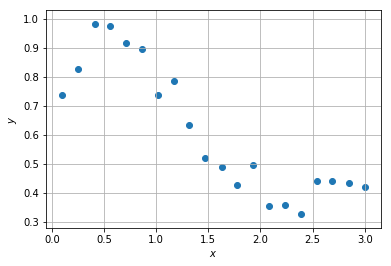

In [3]:
plt.scatter(x,y)
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')

In [39]:
m =5
#Este m depende del grado del polinomio que se quiere evaluar, en este caso es una cubica
#Para poder evaluar una recta tiene que ser m=1 y ahí se la recta más cercana a los datos
M = np.zeros((m+1,m+1))

In [40]:
np.zeros((2,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [41]:
M
#M sin definir un rango de valores

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [42]:
b = np.zeros(m+1)
print(b)

[ 0.  0.  0.  0.  0.  0.]


In [43]:
#realizamos un ciclo en K y P
for k in range(m+1):
    for p in range(m+1):
        M[p,k] = np.sum(x**(p+k))
#columna k verticales y fila p horizontales
for p in range(m+1):
    b[p] = np.sum(y*x**p)
    
print('Matriz =',M)
print('Vector columna =', b)

Matriz = [[  2.00000000e+01   3.10000000e+01   6.35270000e+01   1.46445550e+02
    3.60047681e+02   9.21952486e+02]
 [  3.10000000e+01   6.35270000e+01   1.46445550e+02   3.60047681e+02
    9.21952486e+02   2.42787298e+03]
 [  6.35270000e+01   1.46445550e+02   3.60047681e+02   9.21952486e+02
    2.42787298e+03   6.52576070e+03]
 [  1.46445550e+02   3.60047681e+02   9.21952486e+02   2.42787298e+03
    6.52576070e+03   1.78158677e+04]
 [  3.60047681e+02   9.21952486e+02   2.42787298e+03   6.52576070e+03
    1.78158677e+04   4.92387717e+04]
 [  9.21952486e+02   2.42787298e+03   6.52576070e+03   1.78158677e+04
    4.92387717e+04   1.37435722e+05]]
Vector columna = [  12.2          15.56502      28.7654216    63.25133707  152.42497887
  387.41068288]


In [44]:
M,b
#b es resultado de la multiplicacion de matrices, de las x con las otras variables
#Las matrices correxponde a M*x=b

(array([[  2.00000000e+01,   3.10000000e+01,   6.35270000e+01,
           1.46445550e+02,   3.60047681e+02,   9.21952486e+02],
        [  3.10000000e+01,   6.35270000e+01,   1.46445550e+02,
           3.60047681e+02,   9.21952486e+02,   2.42787298e+03],
        [  6.35270000e+01,   1.46445550e+02,   3.60047681e+02,
           9.21952486e+02,   2.42787298e+03,   6.52576070e+03],
        [  1.46445550e+02,   3.60047681e+02,   9.21952486e+02,
           2.42787298e+03,   6.52576070e+03,   1.78158677e+04],
        [  3.60047681e+02,   9.21952486e+02,   2.42787298e+03,
           6.52576070e+03,   1.78158677e+04,   4.92387717e+04],
        [  9.21952486e+02,   2.42787298e+03,   6.52576070e+03,
           1.78158677e+04,   4.92387717e+04,   1.37435722e+05]]),
 array([  12.2       ,   15.56502   ,   28.7654216 ,   63.25133707,
         152.42497887,  387.41068288]))

In [45]:
a = np.linalg.solve(M,b)
#valores de ao,a1,a2 y a3
#vector de coeficientes
print('Coeficientes = ', a)
#polinomio

Coeficientes =  [ 0.58497395  1.61443772 -2.1288599   0.84092902 -0.09535285 -0.00339031]


In [46]:
def f(x,a):
    suma = 0
    for k in range(m+1):
        suma = suma + a[k]*x**k
    return suma

Text(0,0.5,'$y$')

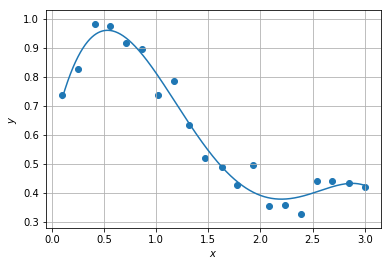

In [47]:
xx = np.linspace(np.min(x),np.max(x),1000)
plt.scatter(x,y)
plt.plot(xx,f(xx,a))
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')

Todo lo anterior viene predeterminado de la forma siguiente:

In [48]:
a

array([ 0.58497395,  1.61443772, -2.1288599 ,  0.84092902, -0.09535285,
       -0.00339031])

In [50]:
a_polyfit = np.polyfit(x,y,5)
#Define un sistema de ecuaciones lineales y lo resuelve
print(a_polyfit)

[-0.00339031 -0.09535285  0.84092902 -2.1288599   1.61443772  0.58497395]


Text(0,0.5,'$y$')

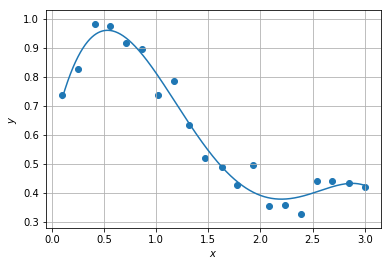

In [51]:
m = 5
#Se define el grado
a_polyfit = np.polyfit(x,y,m)
#Se hace el ajuste y se calculan los coeficientes
xx = np.linspace(np.min(x),np.max(x),1000)
plt.scatter(x,y)
plt.plot(xx,np.polyval(a_polyfit,xx))
#Se grafica el polinomio con los coeficientes ya ajustados en los valores xx
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')

In [60]:
def ajuste(m):
    a_polyfit = np.polyfit(x,y,m)
    xx = np.linspace(np.min(x),np.max(x),1000)
    plt.scatter(x,y)
    plt.plot(xx,np.polyval(a_polyfit,xx))
    plt.grid(True)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    #print(a_polyfit)

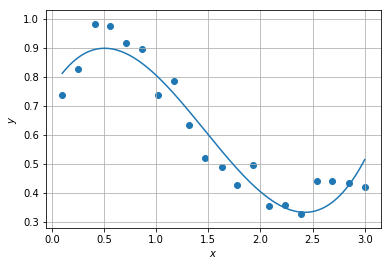

In [61]:
ajuste(3)

In [62]:
from ipywidgets import interact

<function __main__.ajuste>

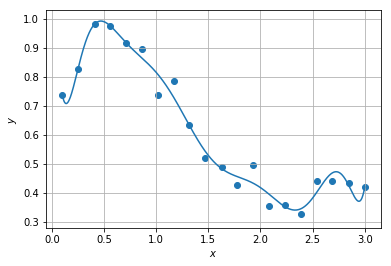

In [65]:
interact(ajuste, m = (0,21))


In [66]:
def ajuste1(m):
    a_polyfit = np.polyfit(x,y,m)
    xx = np.linspace(np.min(x),np.max(x),1000)
    plt.scatter(x,y)
    plt.plot(xx,np.polyval(a_polyfit,xx))
    plt.grid(True)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    chi2 = np.sum((y - np.polyval(a_polyfit,x))**2)
    plt.title('$\\chi^2 = $'+str(chi2) )
    #distancia de las rectas hasta los valores, mientras mayor es el grado más preciso
    #print(a_polyfit)

<function __main__.ajuste1>

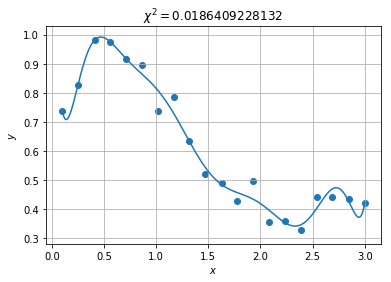

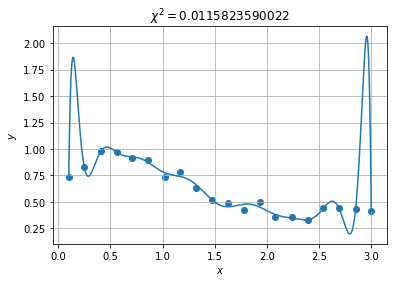

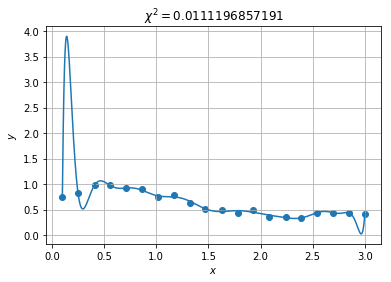

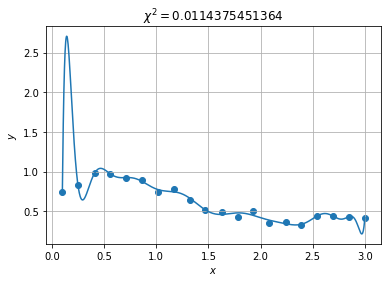

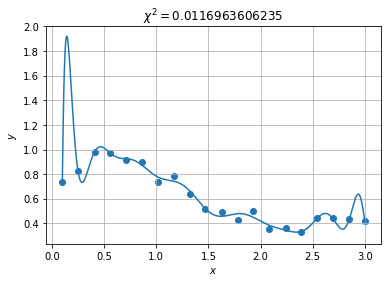

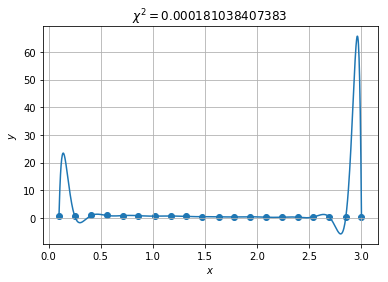

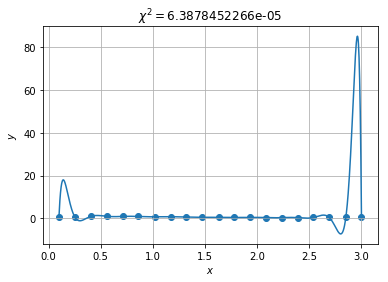

In [68]:
interact(ajuste1, m = (0,21))

\begin{equation}
y(t) = y_0 + v_0 t + \frac{a}{2} t^2 
\end{equation}

In [69]:
datos = np.genfromtxt('caida-recta.txt')
t = datos[:,0]
y = datos[:,1]

Text(0.5,1,'$\\chi^2 = $5.91089313266e-05')

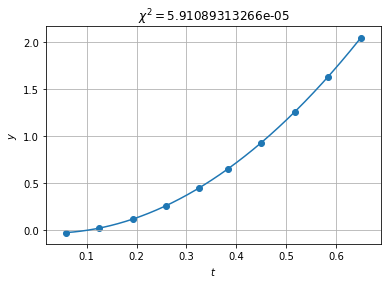

In [72]:
m = 2
a_polyfit = np.polyfit(t,y,m)
tt = np.linspace(np.min(t),np.max(t),1000)
plt.scatter(t,y)
plt.plot(tt,np.polyval(a_polyfit,tt))
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$y$')
chi2 = np.sum((y - np.polyval(a_polyfit,t))**2)
plt.title('$\\chi^2 = $'+str(chi2) )

In [73]:
print(a_polyfit)

[ 5.2996427  -0.25731036 -0.02977626]


In [74]:
acel = 2*a_polyfit[0]
v0 = a_polyfit[1]
y0 = a_polyfit[2]


In [75]:
print(y0)
print(v0)
print(acel)

-0.029776258728
-0.257310359905
10.5992854029
